<a href="https://colab.research.google.com/github/princenishad5471/Projects_Resume_Tnp/blob/main/Economic_and_polictical_events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start = "2014-01-01"
end = "2024-01-01"

nifty = yf.download("^NSEI", start=start, end=end)
usdinr = yf.download("INR=X", start=start, end=end)

data = pd.DataFrame()
data["NIFTY_Close"] = nifty["Close"]
data["USDINR_Close"] = usdinr["Close"]
data.dropna(inplace=True)


/tmp/ipython-input-2698858369.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2698858369.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usdinr = yf.download("INR=X", start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [11]:
data["NIFTY_Return"] = data["NIFTY_Close"].pct_change()
data["USDINR_Return"] = data["USDINR_Close"].pct_change()

data["NIFTY_Vol"] = data["NIFTY_Return"].rolling(7).std()


In [12]:
rbi_dates = [
    "2016-10-04",
    "2020-03-27",
    "2022-05-04",
    "2023-04-06"
]

data["RBI_Event"] = 0
data.loc[data.index.isin(pd.to_datetime(rbi_dates)), "RBI_Event"] = 1


In [13]:
geo_dates = [
    "2019-02-14",  # Pulwama
    "2020-06-15",  # Indo-China clash
    "2022-02-24"   # Russia-Ukraine war
]

data["Geo_Event"] = 0
data.loc[data.index.isin(pd.to_datetime(geo_dates)), "Geo_Event"] = 1


In [14]:
data["USD_Depreciation"] = np.where(
    data["USDINR_Return"] > 0.005, 1, 0
)


In [15]:
data["Macro_Risk_Signal"] = np.where(
    (data["RBI_Event"] == 1) |
    (data["Geo_Event"] == 1) |
    (data["USD_Depreciation"] == 1),
    1, 0
)


In [16]:
signal_analysis = data.groupby("Macro_Risk_Signal")["NIFTY_Return"].agg(
    ["mean", "std", "count"]
)

signal_analysis


,mean,std,count
Macro_Risk_Signal,,,
0,0.000973,0.009600,2205
1,-0.003114,0.015647,244


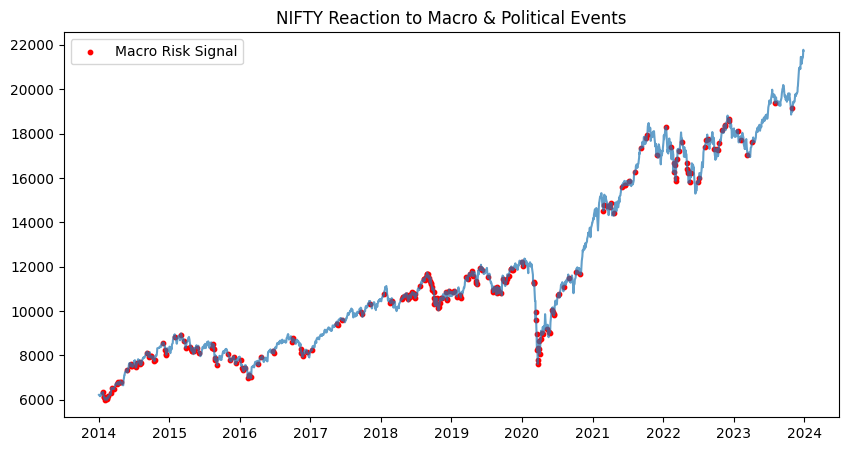

In [17]:
plt.figure(figsize=(10,5))
plt.plot(data.index, data["NIFTY_Close"], alpha=0.7)
plt.scatter(
    data[data["Macro_Risk_Signal"] == 1].index,
    data[data["Macro_Risk_Signal"] == 1]["NIFTY_Close"],
    color="red",
    label="Macro Risk Signal",
    s=10
)
plt.legend()
plt.title("NIFTY Reaction to Macro & Political Events")
plt.show()
